## **Problem Statement:**
- Build a sentiment analysis model using Recurrent Neural Networks (RNNs) to
classify movie reviews from the IMDB dataset into positive or negative
sentiments.

## **Dataset:**
- The dataset comprises 25,000 movie reviews from IMDB, labeled by sentiment
(positive/negative).
- Reviews have been preprocessed, and each review is
encoded as a sequence of word indices (integers).
- The words in the dataset are
indexed by overall frequency in the dataset, allowing for quick filtering operations
such as: `"only consider the top 10,000 most common words, but eliminate the top
20 most common words"`.


**Import Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras import regularizers
import numpy as np

In [2]:
# Load the full vocabulary (no truncation)
(x_train, y_train), (x_test, y_test) = imdb.load_data()  # no num_words

# Get the true vocabulary size from the dataset
vocab_size = max([max(seq) for seq in x_train + x_test]) + 1  # +1 for zero indexing

# Set maxlen for sequence padding
maxlen = 300
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

**Build the RNN Model**

In [3]:
x_train.shape

(25000, 300)

In [4]:
from tensorflow.keras.layers import LSTM, Bidirectional, BatchNormalization
from tensorflow.keras.regularizers import l2

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),

    Bidirectional(LSTM(units=64, return_sequences=True,
                       dropout=0.3, recurrent_dropout=0.3,
                       kernel_regularizer=l2(0.001))),
    BatchNormalization(),

    Bidirectional(LSTM(units=32,
                       dropout=0.3, recurrent_dropout=0.3,
                       kernel_regularizer=l2(0.001))),
    BatchNormalization(),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


**Compile the Model**

In [5]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.00009),
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Train the Model**

In [6]:
history = model.fit(x_train, y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 647s 4s/step - accuracy: 0.5031 - loss: 1.5177 - val_accuracy: 0.4938 - val_loss: 1.2903
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 661s 4s/step - accuracy: 0.5414 - loss: 1.3525 - val_accuracy: 0.5096 - val_loss: 1.2302
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 602s 4s/step - accuracy: 0.5784 - loss: 1.2435 - val_accuracy: 0.6584 - val_loss: 1.1279
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 622s 4s/step - accuracy: 0.6748 - loss: 1.0915 - val_accuracy: 0.7310 - val_loss: 0.9780
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 643s 4s/step - accuracy: 0.7505 - loss: 0.9647 - val_accuracy: 0.7450 - val_loss: 0.9189
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 587s 4s/step - accuracy: 0.7958 - loss: 0.8600 - val_accuracy: 0.7598 - val_loss: 0.8912
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 630s 4s/step - accuracy: 0.8304 - loss: 0.7774 - val_accuracy: 0.7818 - val_loss: 0.8449
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 600s 4s/step - accuracy: 0.8608 - loss: 0.6989 - val_accu

**Evaluate the Model**

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 501s 640ms/step - accuracy: 0.8194 - loss: 0.7955

Test Accuracy: 0.8234


**Plot Training History (Accuracy and Loss)**

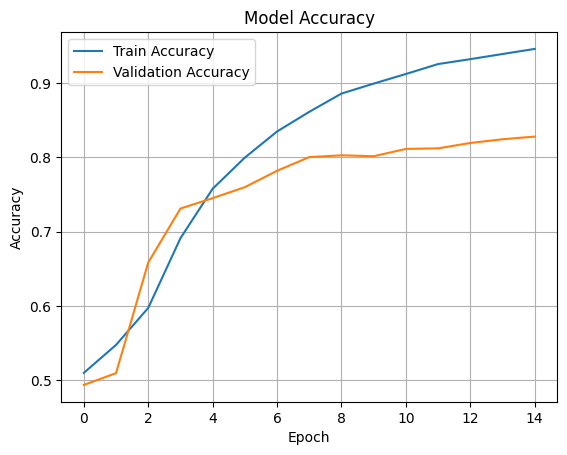

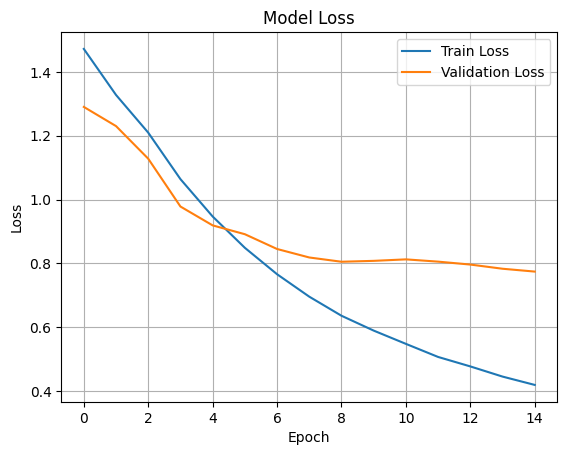

In [8]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

**WordCLoud**

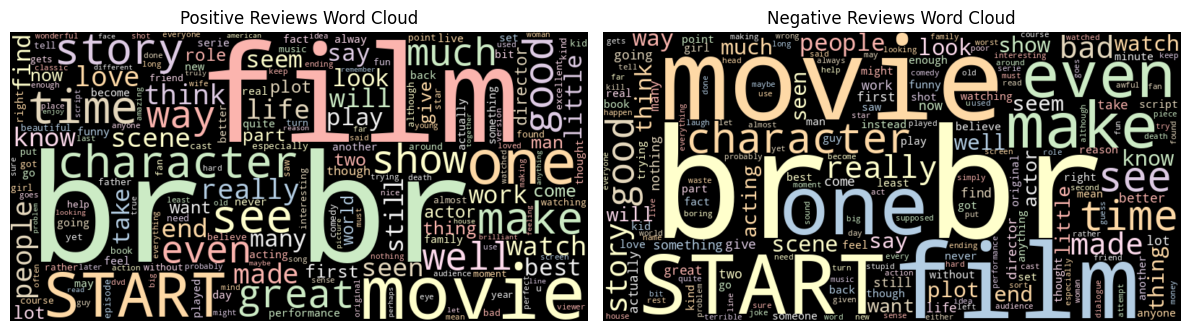

In [9]:
from wordcloud import WordCloud

# Load full data
word_index = imdb.get_word_index()
reverse_word_index = {v + 3: k for k, v in word_index.items()}
reverse_word_index[0] = '<PAD>'
reverse_word_index[1] = '<START>'
reverse_word_index[2] = '<UNK>'

# Decode reviews
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i, '?') for i in encoded_review])

# Separate positive and negative reviews
positive_reviews = [decode_review(x_train[i]) for i in range(len(x_train)) if y_train[i] == 1]
negative_reviews = [decode_review(x_train[i]) for i in range(len(x_train)) if y_train[i] == 0]

# Combine into text
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

# Generate WordClouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Positive Reviews Word Cloud")
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Pastel1').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Negative Reviews Word Cloud")
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Pastel1').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.tight_layout()
plt.show()


**Real Reviews With Predictions**

In [10]:
def display_review_prediction(index):
    review_text = decode_review(x_test[index])
    pred = model.predict(np.expand_dims(x_test[index], axis=0))[0][0]
    sentiment = "Positive" if pred > 0.5 else "Negative"
    print(f"\nReview:\n{review_text}\n")
    print(f"Predicted Sentiment: {sentiment} (Confidence: {pred:.2f})")
    print(f"Actual Sentiment: {'Positive' if y_test[index] == 1 else 'Negative'}")

# Example
display_review_prediction(42)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Review:
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> having been a godzilla fan for many years gamera was to me a cheap knockoff to capitalize on the success of toho's 1 kaiju star attack of the monsters was for me at the time 1975 an almost painful viewing experience br br last weekend i attended the annual godzilla fest known as g fest where carl craig one of the stars of gamera vs made an appearance of course they featured this movie it was one of the most hilarious bad movies